<a href="https://colab.research.google.com/github/whyeon92/ESAA_YB/blob/Online_Quiz/ESAA_Online_Quiz0531_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **kMeans 알고리즘을 적용하여 확인적 군집분석을 수행하시오.**
>변수 설명 ) tot_price : 총구매액, buy_count : 구매횟수,
                   visit_count : 매장방문횟수, avg_price : 평균구매액

In [1]:
#파일 경로 지정 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/ESAAData/"

Mounted at /content/drive


In [46]:
#필요한 모듈 불러오기
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

## 1) 데이터 불러오기 및 탐색

In [47]:
sales = pd.read_csv(path + "product_sales.csv")
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tot_price    150 non-null    float64
 1   visit_count  150 non-null    float64
 2   buy_count    150 non-null    float64
 3   avg_price    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [48]:
print(sales.shape)
print(type(sales))

(150, 4)
<class 'pandas.core.frame.DataFrame'>


## 2) KMeans 를 이용하여 3개의 군집으로 군집화

2-1) KMeans 모델을 생성하세요. 군집은 3개로 군집화하세요.

In [49]:
#모델 생성
kmeans = KMeans(n_clusters = 3)

2-2) 모델을 훈련하고 예측치 생성하고 이 결과를 pred라는 변수에 저장하세요.

In [50]:
pred = kmeans.fit_predict(sales)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2-3) 원형 데이터(scale)에 예측치(변수명:cluster)를 추가하세요.

In [51]:
sales['cluster'] = pred

## 3) 군집화 시각화
: 전체 데이터를 2차원으로 축소한 뒤 시각화하세요.

3-1) cluster 변수를 제외한 sales 데이터를 salesDF라는 이름으로 변수에 저장하세요.

In [52]:
salesDF = sales.drop('cluster', axis = 1)

3-2) salesDF 데이터를 이용하여 2차원으로 차원축소 한 후 그 결과를 sales에 pca_x, pca_y 이름으로 저장하세요.

In [53]:
#차원 축소 한 후 변형된 값 임의의 변수에 저장
pca = PCA(n_components = 2)
pca_df = pca.fit_transform(salesDF)
#sales에 'pca_x', 'pca_y' 이름으로 열 만들어 저장
sales['pca_x'] = pca_df[:, 0]
sales['pca_y'] = pca_df[:, 1]

3-3) pca_x를 x축, pca_y를 y축으로 하여 산점도를 그리세요. 색으로 각 점이 군집에 따라 구분되도록 하세요. (단, 각 군집별로 마커 모양 구분하지 않고 오직 색으로만 구분합니다.)

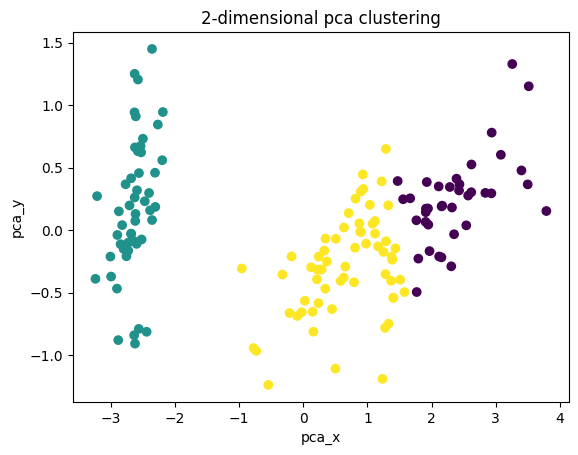

In [54]:
plt.scatter(sales['pca_x'], sales['pca_y'], c = sales['cluster'])
plt.xlabel('pca_x')
plt.ylabel('pca_y')
plt.title("2-dimensional pca clustering")
plt.show()

## 4) 군집평가: 실루엣 계수 구하기

In [56]:
#시각화를 위하여 사용했던 차원 축소 관련 계수 삭제
sales=sales.drop(['pca_x','pca_y'], axis=1)

#cluster 행을 제외한 순수 데이터 sales_data로 저장
sales_data=sales.drop('cluster', axis=1)

4-1) sales의 모든 데이터에 실루엣 계수를 구하고 실루엣 계수 칼럼을 추가하세요.

In [57]:
#sales의 모든 데이터에 실루엣 계수 구하기
silhouette_sales = silhouette_samples(sales, sales['cluster'])

In [58]:
#sales에 실루엣 계수 칼럼 추가
sales['silhouette_score'] = silhouette_sales

4-2) 모든 데이터의 평균 실루엣 계수를 구하세요.

In [59]:
#모든 데이터의 평균 실루엣 계수 값을 구하기
silhouette_score(sales, sales['cluster'])

0.6695115503952082

4-3) 군집별 평균 실루엣 계수를 구하세요.

In [60]:
#군집별 평균 실루엣 계수 구하기
import numpy as np
for i in range(3):
  print(f"{i}번째 군집의 평균 실루엣 계수", np.mean(sales['silhouette_score'][sales['cluster']==i]))

0번째 군집의 평균 실루엣 계수 0.6421973355182388
1번째 군집의 평균 실루엣 계수 0.7652299168643212
2번째 군집의 평균 실루엣 계수 0.6124674052401378
